* modelを作る前にcross-validationについて考えなければならない
* 筆者はここで以下のように述べている
    - _cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data acuurately and also ensures that we do not overfit._
    - クロスバリデーションとは，機械学習モデルを構築するプロセスにおける1つのステップである．モデルがデータに正確にフィットし，オーバーフィットしないことを保証するのに役立つ．

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib
sns.set(font=["IPAexGothic"])

%matplotlib inline

In [2]:
df = pd.read_csv("../data/winequality-red.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
# qualityは0~10の11種類取りうるが，今回のデータでは，3~8の6種類しか存在しない
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

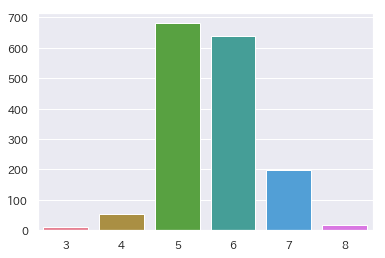

In [5]:
sns.barplot(
    x=df["quality"].value_counts().index,
    y=df["quality"].value_counts().values,
    palette="husl"
)

* 今回のデータセットでは，6種類のqualityタイプしかないので，それらを0~5の値にマッピングする

In [6]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# map関数で辞書の値をマッピングする
df.loc[:, "quality"] = df.quality.map(quality_mapping)

* 分類問題として，今回のデータを捉える
    - その際に，使用するアルゴリズムとしてNeural Networksを思いつくかもしれないが，まずはシンプルなところからスタートするために，決定木を使う


* データセットを2つに分割する（全体: 1599サンプル）
    - 1つは学習用: 1000サンプル
    - もう1つは評価用: 599サンプル

In [7]:
# データフレームをシャッフルしてから，1000サンプル取り出す
df = df.sample(frac=1).reset_index(drop=True)

# 学習用
df_train = df.head(1000)

# 評価/検証用
df_test = df.tail(599)

* 学習データに対して，決定木でモデルを構築する

In [8]:
from sklearn import tree
from sklearn import metrics

# max_depth=3
# 上記以外はデフォルトのパラメータを使用する
clf = tree.DecisionTreeClassifier(max_depth=3)

# 学習に使うカラムを選択する
cols = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]

# targetとして，qualityを使用する
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
# 学習データに対する予測
train_predictions = clf.predict(df_train[cols])

# 評価データに対する予測
test_predictions = clf.predict(df_test[cols])

# 学習データに対する予測のaccuracyを計算する
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# 評価データに対する予測のaccuracyを計算する
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [10]:
print("accuracy for train data:", train_accuracy)
print("accuracy for test data:", test_accuracy)

accuracy for train data: 0.617
accuracy for test data: 0.5659432387312187


* 今回はaccuracyを使ったが，これは最も簡単なメトリクスであるから
* しかしながら，今回の問題においてこれはベストなメトリクスではないかもしれない


* max_depthの値を変化させて，accuracyを確認してみる

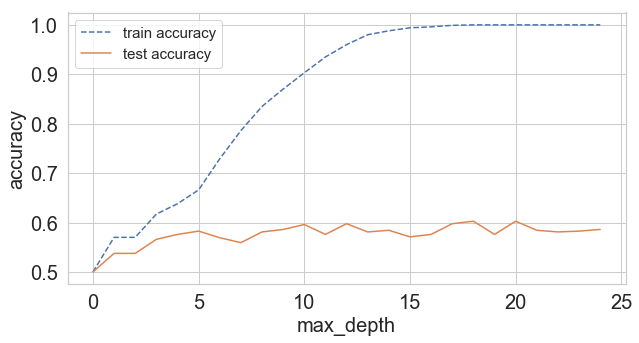

In [11]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

# accuracyを保存するリストを作る
# 初期値は0.5
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
    # モデルの初期化
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # 使用する特徴量
    cols = [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"
    ]
    
    # 上記特徴量でのモデルのfit
    clf.fit(df_train[cols], df_train.quality)
    
    # train/testの予測値
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # train/testのaccuracyの計算
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # accuracyをリストに追加
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# 可視化
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy", ls="--")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={"size": 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

* 上記結果を確認すると
    - 学習データに対してはmax_depthが大きい方がaccuracyが良くなっているが、評価データに対してはほとんど変化がない
    - 未知のデータに対する汎化性能が高くないことがわかる
    
    
* 一方でこの結果はoverfittingではない，評価データの精度はほぼ同じであるため
* overfittingの別の定義として
    - _Another definition of overfitting would be when the test loss increases as we keep improving training loss._
    - 学習データのlossを改善し続けると、評価データのlossが増える場合
        - Neural Networksでは一般的に言えること

* 下記図でError(=Loss)とすると，Training / Test(Validation) Loss共にある時点まではが減少していくが，  
    途中でTest Lossは最小値を取り，training lossは減少し続ける．
    - Test Lossが最小値を取る時点以降はOverfittingしていくことがわかる．
    

<img src="./figures/fig_overfitting.png" width="600" height="400">

<参考> [Underfitting vs. Overfitting (vs. Best Fitting) in Machine Learning](https://www.analyticsvidhya.com/blog/2020/02/underfitting-overfitting-best-fitting-machine-learning/)